<a href="https://colab.research.google.com/github/dtee1/ELG5255-Applied-Machine-Learning/blob/dev/Final_Project/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif, f_regression
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
import warnings
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'Applied_Machine_Learning_Final_Project')
drive.mount(MOUNTPOINT)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
# Load the DUMD test and train dataset 
def loadDataset(): 
  path=os.path.join(DATADIR, 'MCSDatasetNEXTCONLab.csv')
  dataset = pd.read_csv(path)
  return dataset

In [7]:
# This function prepares the test and train dataset 
# 75% of the dataset is used for training and 25% is used for testing 
def prepareDataset(feature,result):
  dataset = loadDataset()
  x = dataset[feature]
  y = dataset[result]
  X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.1718,shuffle=False)
  return X_train,X_test,y_train,y_test,dataset

**Question 1: Best Baseline Performance Using:
            KNN Classifer 
            Logistic Regression 
            SVM
            Decision Tree Classifier 
            Naive Bayes Classifier**

Accuracy of Logistic Regression model: 86.943%
[[   0  325]
 [   0 2164]]
Accuracy of KNN model: 83.206%
[[  97  228]
 [ 190 1974]]
Accuracy of SVM model: 86.943%
[[   0  325]
 [   0 2164]]
Accuracy of Decision Tree model: 92.166%
[[ 234   91]
 [ 104 2060]]


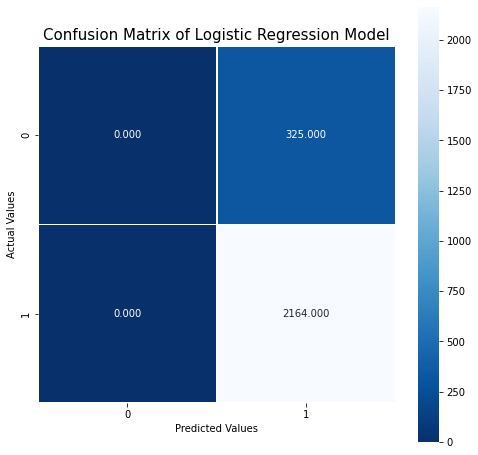

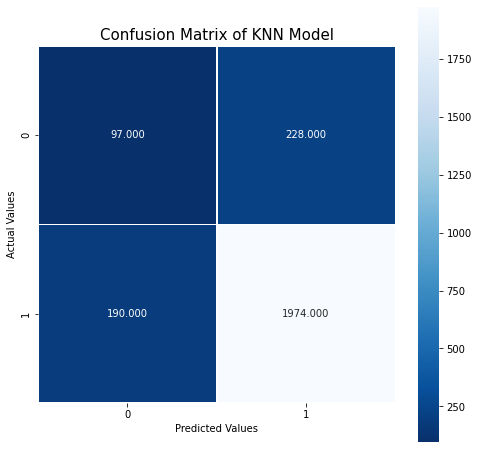

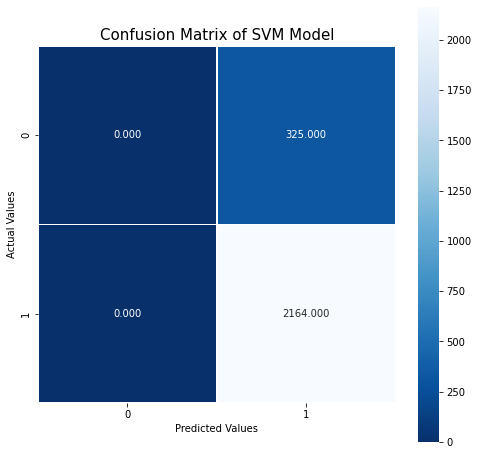

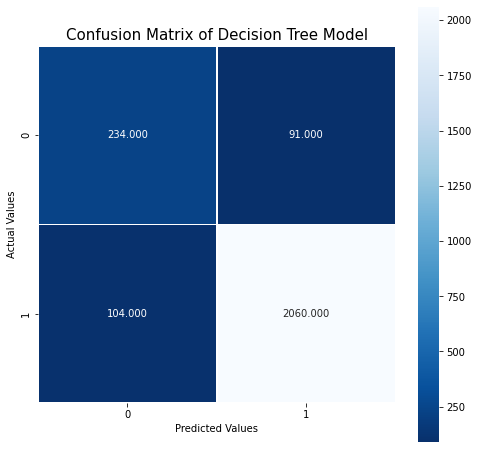

In [8]:
def main():
  warnings.simplefilter('ignore')
  # Dataset features
  features = ['ID','Latitude','Longitude','Hour','Minute','Duration','RemainingTime','Resources','Coverage','OnPeakHours','GridNumber']
  
  # Dataset output
  result = ['Ligitimacy']
  # Split dataset
  X_train,X_test,y_train,y_test,dataset = prepareDataset(features,result)

  # Logistic Regression
  # Logistic Regression

  # Create logistic regression model 
  model_LR = LogisticRegression()
  # Train model
  model_LR.fit(X_train,y_train)
  # Test model
  y_true_LR, y_pred_LR = y_test, model_LR.predict(X_test)
  # Model evaluation
  print('Accuracy of Logistic Regression model: {:.3f}%'.format(accuracy_score(y_test, y_pred_LR) * 100))
  conf_LR = confusion_matrix(y_test, y_pred_LR)
  print(conf_LR)
  plt.figure(1,figsize=(8,8))
  sns.heatmap(conf_LR, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual Values');
  plt.xlabel('Predicted Values');
  plt.title('Confusion Matrix of Logistic Regression Model', size = 15);

  # KNN 
  # KNN
  # Create KNN Model
  model_KNN = KNeighborsClassifier()
  # Train model
  model_KNN.fit(X_train,y_train)
  # Test model
  y_true_KNN, y_pred_KNN = y_test, model_KNN.predict(X_test)
  # Model evaluation
  print('Accuracy of KNN model: {:.3f}%'.format(accuracy_score(y_test, y_pred_KNN) * 100))
  conf_KNN = confusion_matrix(y_test, y_pred_KNN)
  print(conf_KNN)
  plt.figure(2,figsize=(8,8))
  sns.heatmap(conf_KNN, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual Values');
  plt.xlabel('Predicted Values');
  plt.title('Confusion Matrix of KNN Model', size = 15);

  # SVM
  # SVM 
  model_SVM = svm.SVC()
  # Train model
  model_SVM.fit(X_train,y_train)
  # Test model
  y_true_SVM, y_pred_SVM = y_test, model_SVM.predict(X_test)
  # Model evaluation
  print('Accuracy of SVM model: {:.3f}%'.format(accuracy_score(y_test, y_pred_SVM) * 100))
  conf_SVM = confusion_matrix(y_test, y_pred_SVM)
  print(conf_SVM)
  plt.figure(3,figsize=(8,8))
  sns.heatmap(conf_SVM, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual Values');
  plt.xlabel('Predicted Values');
  plt.title('Confusion Matrix of SVM Model', size = 15);

  # Decision Tree Classifier
  model_DT=DecisionTreeClassifier()
  # Train model
  model_DT.fit(X_train,y_train)
  # Test model
  y_true_DT, y_pred_DT = y_test, model_DT.predict(X_test)
  # Model evaluation
  print('Accuracy of Decision Tree model: {:.3f}%'.format(accuracy_score(y_test, y_pred_DT) * 100))
  conf_DT = confusion_matrix(y_test, y_pred_DT)
  print(conf_DT)
  plt.figure(4,figsize=(8,8))
  sns.heatmap(conf_DT, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual Values');
  plt.xlabel('Predicted Values');
  plt.title('Confusion Matrix of Decision Tree Model', size = 15);

if __name__ == '__main__':
  main()

**Question 2: Dimensionality Reduction Techniques **

In [10]:
def main():
  warnings.simplefilter('ignore')
  # Dataset features
  features = ['ID','Latitude','Longitude','Hour','Minute','Duration','RemainingTime','Resources','Coverage','OnPeakHours','GridNumber']
  
  # Dataset output
  result = ['Ligitimacy']
  # Split dataset
  X_train,X_test,y_train,y_test,dataset = prepareDataset(features,result)
  accuracy_DT = []

  # Using Principal Component Analysis to determine optimal number of components
  for count in range(1, len(features)+1):
    pca = PCA(n_components = count, random_state=0)
    X_train_new = pca.fit_transform(X_train)
    X_test_new = pca.transform(X_test)
    model_DT=DecisionTreeClassifier()
    model_DT.fit(X_train_new, y_train)

    # Predicting the Test set results
    y_pred_DT = model_DT.predict(X_test_new)
    accuracy_DT.append(accuracy_score(y_test, y_pred_DT)*100)
  print("\n Logistic Regression")
  print("Maximum accuracy is", round(max(accuracy_DT),2), "% gotten using ", accuracy_DT.index(max(accuracy_DT)) + 1, " components")
  print("Minmum accuracy is", round(min(accuracy_DT),2), "% gotten using ", accuracy_DT.index(min(accuracy_DT)) + 1, " components")
  accuracy_LR = [round(value, 2) for value in accuracy_DT]
  print("Accuracy values %:", accuracy_LR)

  # Using Autoencoder
  
if __name__ == '__main__':
  main()


 Logistic Regression
Maximum accuracy is 95.54 % gotten using  3  components
Minmum accuracy is 91.6 % gotten using  9  components
Accuracy values %: [95.02, 94.78, 95.54, 95.06, 94.66, 95.54, 94.74, 93.97, 91.6, 94.17, 93.57]
